In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection, naive_bayes
from nltk import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.datasets import fetch_20newsgroups
from nltk import pos_tag
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

data = newsgroups.data
target = newsgroups.target

categories = newsgroups.target_names



In [2]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenize the data
list_tokens = [word_tokenize(i) for i in data]

# Define stop words and punctuation
punc = set(string.punctuation)
stop_words = set(stopwords.words('english'))
stop_words.update(punc)

# Remove stop words and punctuation
list_tokens = [[word for word in sublist if word.lower() not in stop_words and word.isalnum()] for sublist in list_tokens]


In [3]:
clean_doc = []
for doc in list_tokens:
    clean = [lemmatizer.lemmatize(word.lower()) for word in doc]
    clean_doc.append(clean)

In [4]:
clean_doc = [" ".join(words) for words in clean_doc]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
xtr,xts,ytr,yts = train_test_split(clean_doc, target, random_state=1, test_size=0.2)

In [13]:
tfidf = TfidfVectorizer(ngram_range=(1,2),min_df=18, max_df=700)

In [14]:

x_train = tfidf.fit_transform(xtr)

x_test = tfidf.transform(xts)

In [15]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB()
nb.fit(x_train, ytr)

MultinomialNB()

In [16]:

nb.score(x_test,yts)

0.713262599469496

In [17]:
from sklearn.metrics import confusion_matrix as cnf, classification_report as cr
y_pred = nb.predict(x_test)
print(cr(yts,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.53      0.63       161
           1       0.64      0.65      0.64       193
           2       0.70      0.54      0.61       205
           3       0.64      0.73      0.68       213
           4       0.73      0.62      0.67       189
           5       0.66      0.77      0.71       188
           6       0.77      0.77      0.77       201
           7       0.79      0.72      0.76       202
           8       0.76      0.73      0.74       203
           9       0.53      0.89      0.67       185
          10       0.94      0.87      0.90       218
          11       0.77      0.72      0.75       207
          12       0.66      0.61      0.63       181
          13       0.80      0.83      0.81       195
          14       0.84      0.81      0.82       204
          15       0.58      0.86      0.69       208
          16       0.65      0.77      0.71       185
          17       0.80    

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_confusion_matrix(conf_matrix, classes,cmap='Blues'):

    title = 'Confusion Matrix'

    plt.figure(figsize=(9,9))
    sns.set(font_scale=0.75)
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

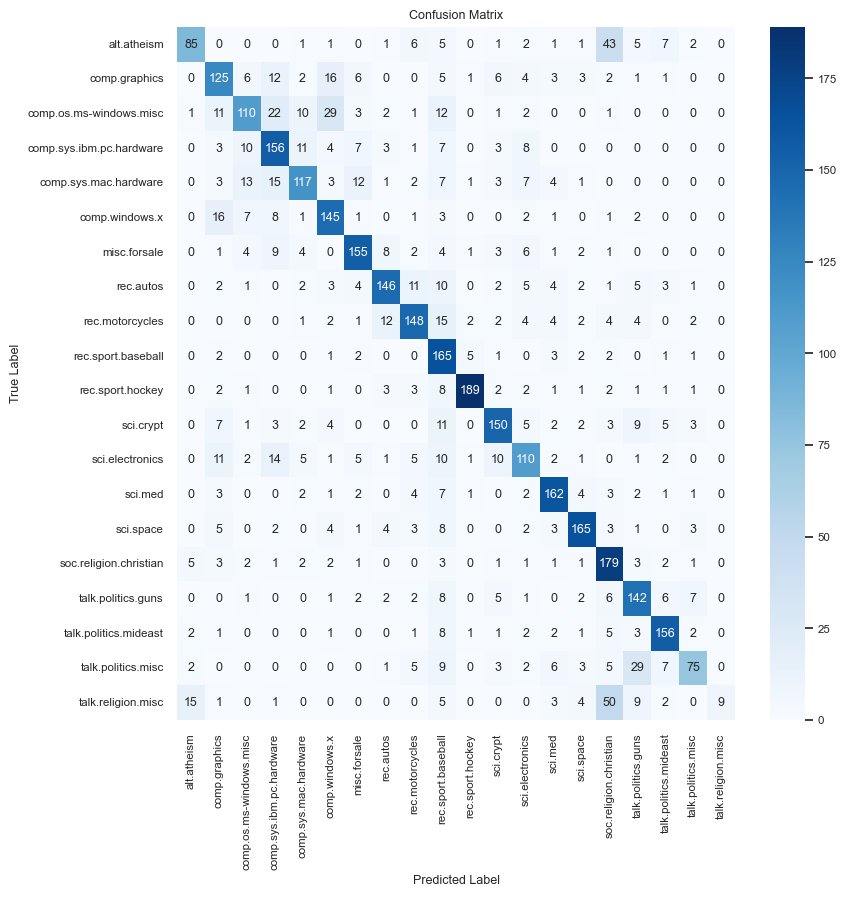

In [44]:
plot_confusion_matrix(cnf(yts,y_pred), categories)